In [ ]:
#Importing packages we are going to work on
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the xlsx file
data = pd.read_excel("Factures.xlsx")

# Drop rows with - values
for column in ['FechaFactura', 'puntDeVenda', 'IDArtOriginal', 'Sum(Unidades * mult)','Sum(ImporteNeto)']:
    data = data.drop(data[data[column] == "-"].index)
data
#data.head()

,NumeroFactura,FechaFactura,puntDeVenda,SerieFactura,CodigoCliente,IDArtOriginal,Sum(Unidades * mult),Sum(ImporteCoste),Sum(ImporteNeto),%Descuento
0,932308,7/11/2022 12:00:00 AM,Backoffice,V1,432980,BA750310,18.0,48.24,101.700,0
1,932308,7/11/2022 12:00:00 AM,Backoffice,V1,432980,BA750320,18.0,48.24,101.700,0
2,932309,7/11/2022 12:00:00 AM,Backoffice,V1,139100,BA750311,612.0,1640.16,1967.580,0
3,932310,7/11/2022 12:00:00 AM,Backoffice,V1,433114,BA7500403-21,72.0,101.52,194.400,0
4,932310,7/11/2022 12:00:00 AM,Backoffice,V1,433114,BA750231-18,4.0,18.00,25.920,0
...,...,...,...,...,...,...,...,...,...,...
342493,984133,9/1/2013 12:00:00 AM,Botiga Falset,V8,135000,GR010010,2.0,1.52,2.562,-
342494,984134,9/1/2013 12:00:00 AM,Botiga Falset,V8,310214,GR010030,4.0,3.04,4.868,-
342495,984135,9/1/2013 12:00:00 AM,Botiga Falset,V8,135000,BA750210,3.0,17.61,36.942,-
342496,984135,9/1/2013 12:00:00 AM,Botiga Falset,V8,135000,BA750310,1.0,2.68,5.372,-


In [ ]:
#Step1: first Run "preparar_datos" function in order to prepare our whole dataset

#Step2: Run "prepare_dev" function to claculate total sales and get the list of potential item
#and make new dataset based on potential Items called "dd"

#Step3: Run "deviation" function which later we are going to use it in "low_items"

#Step4: Run "low_item" function to get the list of products that was out of boundries

#Step5&6: Run "deviation_p" and "plot_dev" to get graph of lower sell Items

#Step7: Run "High_item" in order to get high sell Items

# Then repeat steps 5&6 to get the graph of those Items


In [ ]:
#Step1
def preparar_datos(datos, producto, cantidad_minimo):
  
  producto = datos[datos['IDArtOriginal']== producto]
  producto.Timestamp = pd.to_datetime(producto.FechaFactura)
  producto.index = producto.Timestamp
  producto = producto.resample('M').sum()
  producto['Sum(Unidades * mult)'][producto['Sum(Unidades * mult)'] < cantidad_minimo] = pd.NA
  return producto[['Sum(Unidades * mult)']]

In [ ]:
#Step2
def prepare_dev(data, cantidad_minimo):

  # Calculate total sales 
  productos = data["IDArtOriginal"].unique()
  cantidad = []
  for c in productos:
    
    cantidad.append(data["Sum(Unidades * mult)"][data["IDArtOriginal"]==c].sum())
  frequency = pd.DataFrame(productos, columns=['producto'])
  frequency['cantidad'] = cantidad
  #frequency.to_excel('Producto_cantidad.xlsx', index=None)
  frequency

  potential_items = frequency.nlargest(n=400, columns=['cantidad']) 
  final_items = []
  for p in list(potential_items.producto):
    a=preparar_datos(data, p, cantidad_minimo) # Get product sales per month with minimum quantity of 100
    # Set the filter conditions:
    # Condition 1: The product contains at least 24 months of sales history
    # Condition 2: The product contains sales history in the previous few months
    # Condition 3: The product contains less than 10% of months with null values
    if a.size >24 and a[a.index > '2022-03-01'].shape[0]>1 and a.isna().sum().values[0]< int(a.size * 0.1):
        final_items.append(p)
  final_items
  
  df_prepare_dev = data[data['IDArtOriginal'].isin(final_items)]
  

  return df_prepare_dev

In [ ]:
#The main dataset is dd
dd = prepare_dev(data, cantidad_minimo= 100)
dd

,NumeroFactura,FechaFactura,puntDeVenda,SerieFactura,CodigoCliente,IDArtOriginal,Sum(Unidades * mult),Sum(ImporteCoste),Sum(ImporteNeto),%Descuento
0,932308,7/11/2022 12:00:00 AM,Backoffice,V1,432980,BA750310,18.0,48.24,101.700,0
1,932308,7/11/2022 12:00:00 AM,Backoffice,V1,432980,BA750320,18.0,48.24,101.700,0
5,1169882,7/11/2022 12:00:00 AM,Botiga Falset,V8,999998,BA750310,3.0,8.04,19.560,0
6,1169883,7/11/2022 12:00:00 AM,Botiga Falset,V8,999998,BA750320,2.0,5.36,13.040,0
8,1169883,7/11/2022 12:00:00 AM,Botiga Falset,V8,999998,BA750310,1.0,2.68,6.520,0
...,...,...,...,...,...,...,...,...,...,...
342480,984122,9/1/2013 12:00:00 AM,Botiga Falset,V8,135000,GA050090,1.0,17.00,20.909,-
342487,984129,9/1/2013 12:00:00 AM,Botiga Falset,V8,135000,GA020070,1.0,5.51,9.504,-
342490,984131,9/1/2013 12:00:00 AM,Botiga Falset,V8,310294,GR010010,5.0,3.80,6.085,-
342493,984133,9/1/2013 12:00:00 AM,Botiga Falset,V8,135000,GR010010,2.0,1.52,2.562,-


In [ ]:
dd['IDArtOriginal'].unique()

array(['BA750310', 'BA750320', 'GA020070', 'GA050090', 'GA020020',
       'GR010010', 'GR010020', 'GR010070'], dtype=object)

In [ ]:
#Step3
# define deviation function in order to see statistical parametrs for each product per month
# and based on that detect the the date where the quantity of products was out of the boundries

def deviation(data, product, cantidad_minimo, percentage):

  
  df = preparar_datos(data, product, cantidad_minimo)
  
#change the column name
  df['Sum(Unidades * mult)'] = df['Sum(Unidades * mult)'].fillna(0)
  df.rename(columns = {'Sum(Unidades * mult)':'Unidades'}, inplace = True)

#calculating exponential moving average 
  df['mean_count'] = df['Unidades'].ewm(span=4).mean()

#calculating lower and upper bound based on 25% and 75% quantile
  q1= df['Unidades'].quantile(q=0.25)
  q3= df['Unidades'].quantile(q=0.75) 
#calculate Interquartile Range   
  iqr= q3 - q1   
  lower = ( 1.5*iqr - q1) 
  upper = ( 1.5*iqr + q3)

#calculates the standard deviation of the dataset and adds the stationary standard deviation to the moving average.  

  std = np.std(df.iloc[:,0])
 

  df['pos_std'] = df.mean_count + std
  df['neg_std'] = df.mean_count - std
  df['pos_std_2'] = df.mean_count + 2*std
  df['neg_std_2'] = df.mean_count - 2*std

#Set a boundry line based on IQR method and depends on how many percentages up or down from IQR
  df['upper_per'] = (upper + ((percentage/100)*upper))
  df['lower_per'] = (lower - ((percentage/100)*lower))
  #df.to_excel("Unidad_deviation.xlsx")

  return df

In [ ]:
#Step4
#Detect the Items which has low Unidad in specific date.

def low_item(data, cantidad_minimo, percentage, period):

#get the list of Items based on "prepare_dev"
  df = prepare_dev(data, cantidad_minimo)
  product = df["IDArtOriginal"].unique()
  items_low = []
  mean_low = []
  Unidad_low = []
  lower_bound_low = []
  upper_bound_low =[]
  
#For each Items calculate the deviation prameters  
  for p in product:
    
    a = deviation(data, p, cantidad_minimo, percentage)
    period = period
    a = a[a.index == period]
    
    
# detect if the unit of Items are less than defined boundry     
    if (a['Unidades'].values <= a['lower_per'].values):
      
      items_low.append(p)
      mean_low.append(a['mean_count'].values.ravel())
      Unidad_low.append(a['Unidades'].values.ravel())
      lower_bound_low.append(a['lower_per'].values.ravel())
      upper_bound_low.append(a['upper_per'].values.ravel())

#Make a dataframe from those Items

  df_low = pd.DataFrame(
    {'producto': items_low,'Unidad': Unidad_low, 'mean': mean_low, 'lower_bound' : lower_bound_low,
     'upper_bound': upper_bound_low

    })
  
#Remove [] from columns value  
  
  df_low['Unidad'] = pd.DataFrame([str(line).strip('[').strip('.]') for line in df_low['Unidad']])
  df_low['Unidad'] = df_low['Unidad'].astype(float)
  df_low['mean'] = pd.DataFrame([str(line).strip('[').strip('.]') for line in df_low['mean']])
  df_low['mean'] = df_low['mean'].astype(float)
  df_low['lower_bound'] = pd.DataFrame([str(line).strip('[').strip('.]') for line in df_low['lower_bound']])
  df_low['lower_bound'] = df_low['lower_bound'].astype(float)
  df_low['upper_bound'] = pd.DataFrame([str(line).strip('[').strip('.]') for line in df_low['upper_bound']])
  df_low['upper_bound'] = df_low['upper_bound'].astype(float)
  
#Remove Items which has a "0" value in all columns 
  df_low = df_low.set_index('producto')
  df_low = df_low.loc[(df_low != 0).any(axis=1)]
  
  df_low = df_low.reset_index()

#Sort data from low to high and show the first 5 Items 
  df_low = df_low.sort_values(by=['Unidad'], ascending=True)
  df_low = df_low.head(5)

#Save table in to the excel file  
  df_low.to_excel("lower_sell.xlsx")

  
  return df_low

In [ ]:
Low = low_item(dd, cantidad_minimo = 100, percentage = 10, period = '2022-08-31')
Low

,producto,Unidad,mean,lower_bound,upper_bound
1,BA750320,0.0,906.880223,1988.662500,5136.312500
2,GA020020,0.0,570.118892,1430.325000,3404.225000
3,GR010010,0.0,322.355693,267.530625,2572.453125
4,GR010020,0.0,122.846828,68.681250,931.906250
0,BA750310,121.0,773.923278,198.112500,2192.162500


In [ ]:
#Step5
def deviation_p(data, product, cantidad_minimo, percentage):

  
  df = preparar_datos(data, product, cantidad_minimo)

#change the column name
  df['Sum(Unidades * mult)'] = df['Sum(Unidades * mult)'].fillna(0)
  df.rename(columns = {'Sum(Unidades * mult)':'Unidades'}, inplace = True)

#calculating exponential moving average 
  df['mean_count'] = df['Unidades'].ewm(span=4).mean()

#calculating lower and upper bound based on 25% and 75% quantile
  q1= df['Unidades'].quantile(q=0.25)
  q3= df['Unidades'].quantile(q=0.75) 
#calculate Interquartile Range   
  iqr= q3 - q1   
  lower = ( 1.5*iqr - q1) 
  upper = ( 1.5*iqr + q3)

#calculates the standard deviation of the dataset and adds the stationary standard deviation to the moving average.  

  std = np.std(df.iloc[:,0])
 

  df['pos_std'] = df.mean_count + std
  df['neg_std'] = df.mean_count - std
  df['pos_std_2'] = df.mean_count + 2*std
  df['neg_std_2'] = df.mean_count - 2*std

#Set a boundry line based on IQR method and depends on how many percentages up or down from IQR
  df['upper_per'] = (upper + ((percentage/100)*upper))
  df['lower_per'] = (lower - ((percentage/100)*lower))
  #df.to_excel("Unidad_deviation.xlsx")

#make excel list from product that is upper than boundry
  Detect1 = df.query(" Unidades > upper_per ")
  #Detect1.to_excel("upper_than_upperbound.xlsx")

#make excel list from product that is lower than boundry  
  Detect2 = df.query(" Unidades < lower_per")
  #Detect2.to_excel("lower_than_lowerbound.xlsx")

  fig, ax1 = plt.subplots(1, 1,figsize=(12, 8))
  ax1.plot(list(df.index),df.iloc[:,0],'b')
  ax1.plot(list(df.index),df.mean_count,'r')
  ax1.fill_between(df.index,df.pos_std,df.neg_std,color='red',alpha=0.3,label='std')

  ax1.fill_between(df.index,df.upper_per,df.lower_per,color='green',alpha=0.1,label='Range')
  
  
  ax1.set_xlabel('Date')
  ax1.set_ylabel('Sum(Unidades)')
  ax1.legend();

  #Save as a png
  plt.savefig('Deviation_Alert {0}.jpg'.format(product))
  
  return plt

In [ ]:
#Step6
#make graph based on historical data for each specific product in the list of High or Low sell

def plot_dev(data, data_dev, cantidad_minimo, percentage):
  product = data_dev['producto']
  for p in product:
    dd = deviation_p(data, p , cantidad_minimo, percentage)
  return dd  


,Unidades,mean_count,pos_std,neg_std,pos_std_2,neg_std_2,upper_per,lower_per
FechaFactura,,,,,,,,
2013-09-30,311.0,311.000000,833.613077,-211.613077,1356.226154,-734.226154,2192.1625,198.1125
2013-10-31,1232.0,886.625000,1409.238077,364.011923,1931.851154,-158.601154,2192.1625,198.1125
2013-11-30,454.0,665.897959,1188.511036,143.284882,1711.124113,-379.328195,2192.1625,198.1125
2013-12-31,1577.0,1084.602941,1607.216018,561.989864,2129.829095,39.376787,2192.1625,198.1125
2014-01-31,1111.0,1096.052047,1618.665124,573.438970,2141.278201,50.825893,2192.1625,198.1125
...,...,...,...,...,...,...,...,...
2022-04-30,1145.0,980.321592,1502.934669,457.708515,2025.547746,-64.904562,2192.1625,198.1125
2022-05-31,1419.0,1155.792955,1678.406032,633.179878,2201.019109,110.566801,2192.1625,198.1125
2022-06-30,1368.0,1240.675773,1763.288850,718.062696,2285.901927,195.449619,2192.1625,198.1125


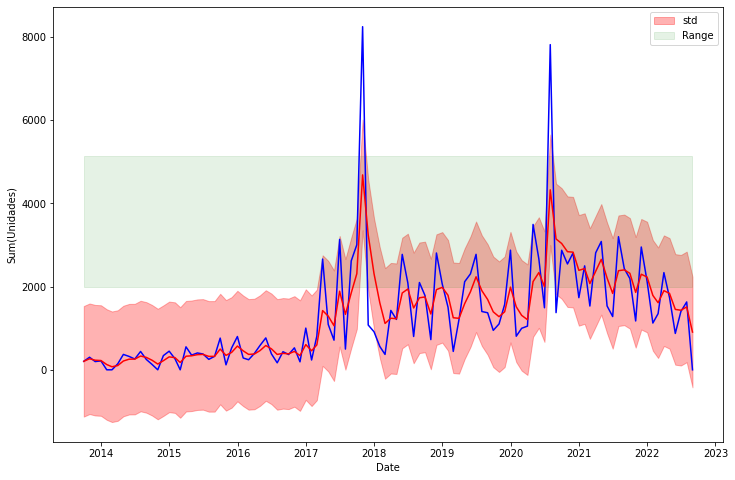

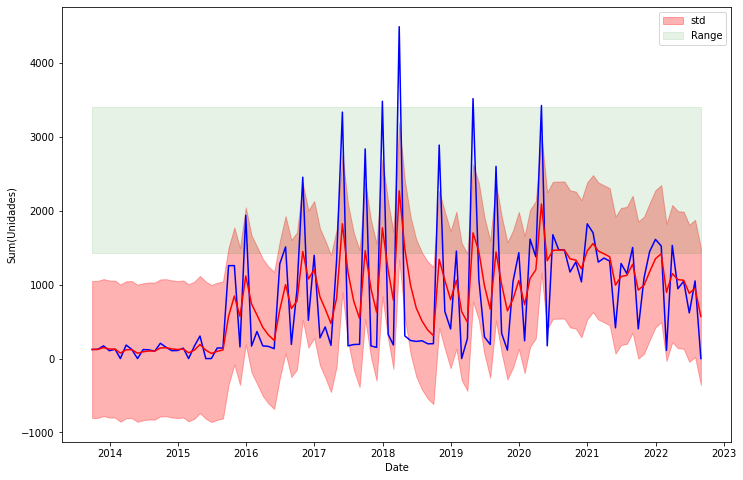

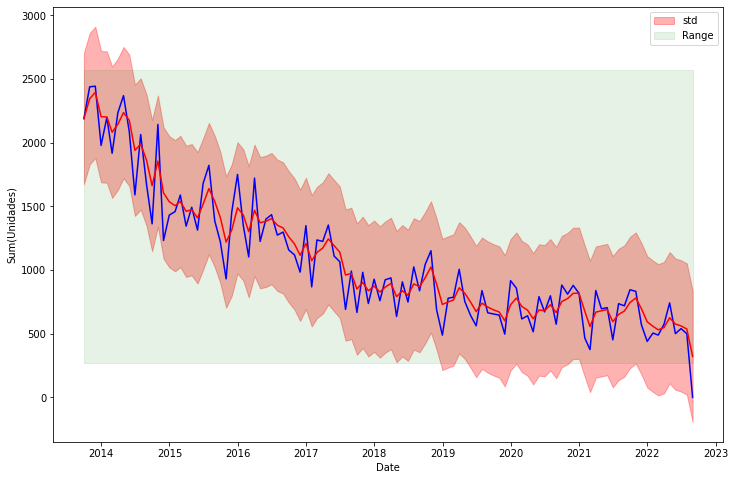

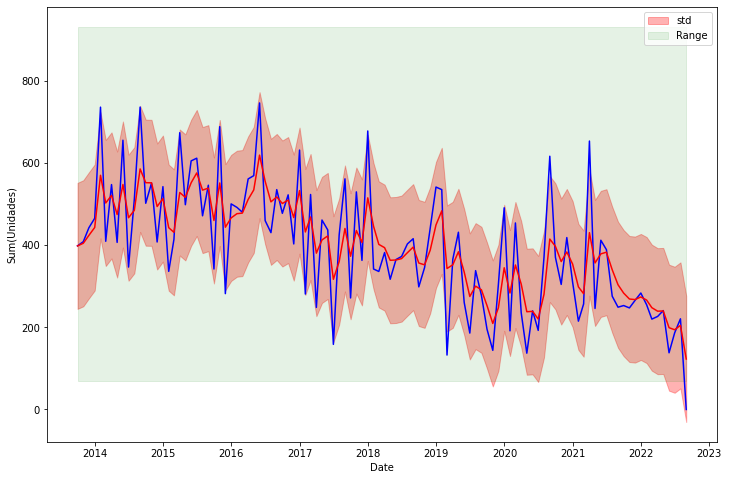

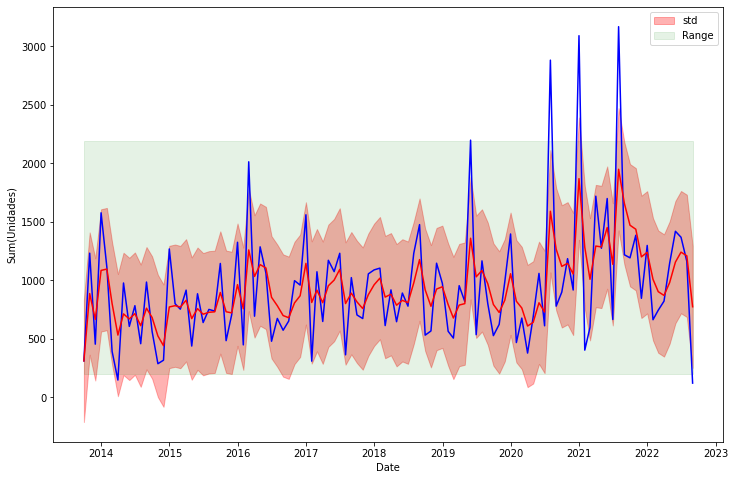

In [ ]:
a = plot_dev(dd, data_dev = Low, cantidad_minimo = 100, percentage = 10)
a

#High_Items

In [ ]:
#Step7
#Detect the Items which has High Unidad in specific date.

def High_item(data, cantidad_minimo, percentage, period):

 #get the list of Items based on "prepare_dev" 

  df = prepare_dev(data, cantidad_minimo)
  product = df["IDArtOriginal"].unique()
  items_High = []
  mean_High = []
  Unidad_High = []
  lower_bound_High = []
  upper_bound_High =[]
  
  #For each Items calculate the deviation prameters  
  for p in product:
    
    a = deviation(data, p, cantidad_minimo, percentage)
    period = period
    a = a[a.index == period]
    
    
# detect if the unit of Items are more than defined boundry     
    if (a['Unidades'].values >= a['upper_per'].values):
      
      items_High.append(p)
      mean_High.append(a['mean_count'].values.ravel())
      Unidad_High.append(a['Unidades'].values.ravel())
      lower_bound_High.append(a['lower_per'].values.ravel())
      upper_bound_High.append(a['upper_per'].values.ravel())


  df_High = pd.DataFrame(
    {'producto': items_High,'Unidad': Unidad_High, 'mean': mean_High, 'lower_bound' : lower_bound_High,
     'upper_bound': upper_bound_High

    })
  
  df_High['Unidad'] = pd.DataFrame([str(line).strip('[').strip('.]') for line in df_High['Unidad']])
  df_High['Unidad'] = df_High['Unidad'].astype(float)
  df_High['mean'] = pd.DataFrame([str(line).strip('[').strip('.]') for line in df_High['mean']])
  df_High['mean'] = df_High['mean'].astype(float)
  df_High['lower_bound'] = pd.DataFrame([str(line).strip('[').strip('.]') for line in df_High['lower_bound']])
  df_High['lower_bound'] = df_High['lower_bound'].astype(float)
  df_High['upper_bound'] = pd.DataFrame([str(line).strip('[').strip('.]') for line in df_High['upper_bound']])
  df_High['upper_bound'] = df_High['upper_bound'].astype(float)
  
 
  df_High = df_High.set_index('producto')
  df_High = df_High.loc[(df_High != 0).any(axis=1)]
  
  df_High = df_High.reset_index()
  df_High = df_High.sort_values(by=['Unidad'], ascending=False)
  df_low = df_low.head(5)
  df_low.to_excel("High_sell.xlsx")

  
  return df_High

In [ ]:
High = High_item(dd, cantidad_minimo = 100, percentage = 10, period = '2013-09-30' )
High

,producto,Unidad,mean,lower_bound,upper_bound
0,GR010070,376.5,376.5,-38.1375,355.7125


,Unidades,mean_count,pos_std,neg_std,pos_std_2,neg_std_2,upper_per,lower_per
FechaFactura,,,,,,,,
2013-09-30,376.50,376.500000,468.260486,284.739514,560.020971,192.979029,355.7125,-38.1375
2013-10-31,217.25,276.968750,368.729236,185.208264,460.489721,93.447779,355.7125,-38.1375
2013-11-30,181.00,228.005102,319.765588,136.244616,411.526073,44.484131,355.7125,-38.1375
2013-12-31,333.70,276.578125,368.338611,184.817639,460.099096,93.057154,355.7125,-38.1375
2014-01-31,277.75,277.086398,368.846884,185.325913,460.607370,93.565427,355.7125,-38.1375
...,...,...,...,...,...,...,...,...
2022-04-30,250.25,205.439931,297.200417,113.679446,388.960903,21.918960,355.7125,-38.1375
2022-05-31,165.00,189.263959,281.024444,97.503473,372.784930,5.742988,355.7125,-38.1375
2022-06-30,185.00,187.558375,279.318861,95.797890,371.079347,4.037404,355.7125,-38.1375


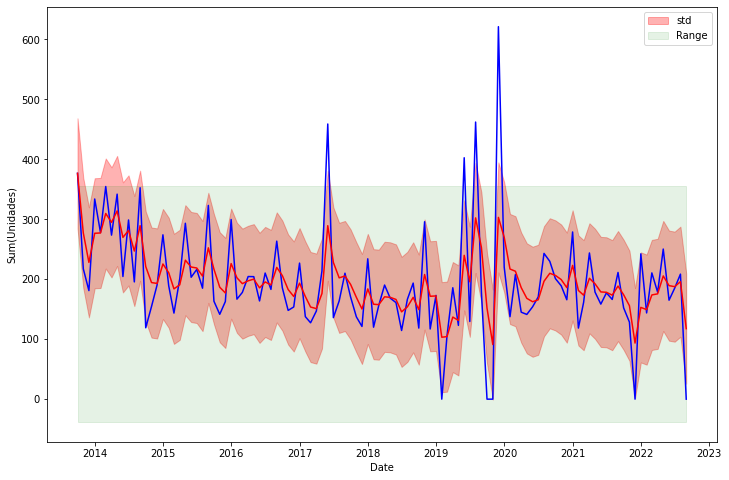

In [ ]:
a = plot_dev(dd,  High, cantidad_minimo = 100, percentage = 10)
a